# LOAN PREDICTION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

## DATA COLLECTION

In [3]:
df_loan = pd.read_csv('train.csv')
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df_loan.shape

(614, 13)

__Features__:

1. __Loan_ID__
    - Unique Number of Applicant Data
2. __Gender__
    - Male/ Female 
3. __Married__
    - Applicant Married (Yes/ No)
4. __Dependents__
    - Number of Dependents (Family or Siblings)
5. __Education__ 
    - Applicant Education (Graduate/Non Graduate)
6. __Self_Employed__
    - Self Employed (Yes/ No)
7. __ApplicantIncome__
    - Applicant Income (US $)
8. __CoApplicantIncome__
    - Co Applicant Income (US $)
9. __LoanAmount__ 
    - Loan Amount (Thousand US $)
10. __LoanAmountTerm__
    - Term of loan in days
11. __Credit_History__
    - Credit history (Ever/ Never)
12. __Property_Area__
    - Urban: Large size & High Density of Population > 100K, Heterogeneity, High Mobility.
    - Semiurban: Between Urban & Rural 
    - Rural: Outside Cities or Towns (Villlages or Hamlets), contradicty of Urban

__Target__: 

__Loan_Status__
    - Loan Approved (Yes/ No)

In [5]:
# Describe numerical data
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### From describe we know that in this dataset it have 4 features of continuous data (Applicant Income, Co-Applicant Income, Loan Amount, Loan Amount Term) and a binary feature (Credit History)

In [6]:
# Change Credit History data become Object
# df_loan['Credit_History'] = df_loan['Credit_History'].astype('O')

In [7]:
# Describe categorical data
df_loan.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001688,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


### From describe we know that what is the most data in each categorical features, frequency refer to how many data which consist of top

In [8]:
df_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
### Put off Loan ID cause it just needed for database but nothing to do in here
df_loan = df_loan.drop('Loan_ID', axis=1)

### The dataset dominate by object type, so we will convert all features, of course except Loan ID as unique number

In [10]:
df_loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### The dataset have several null value in some features, but the target (Loan Status) fill fully without null

In [11]:
# Get correlation of numerical data
# Median not affected with outliers
df_loan.groupby('Loan_Status').median() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,129.0,360.0,1.0
Y,3812.5,1239.5,126.0,360.0,1.0


### Co-Applicant pattern can be seen, if Loan Status No, the Co-Applicant Income is small

### Execute Handling NaN with any methods or assume 

## EDA

### Numerical Data Handling NaN

In [12]:
# Numerical Features
df_loan['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [13]:
df_loan['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [14]:
# Handling Null Numerical Data
# We will fill NaN value with modus data
df_loan['LoanAmount'] = df_loan['LoanAmount'].fillna(df_loan['LoanAmount'].mode()[0])
df_loan['Loan_Amount_Term'] = df_loan['Loan_Amount_Term'].fillna(df_loan['Loan_Amount_Term'].mode()[0])

print(df_loan['Loan_Amount_Term'].isnull().any())
print(df_loan['LoanAmount'].isnull().any())

False
False


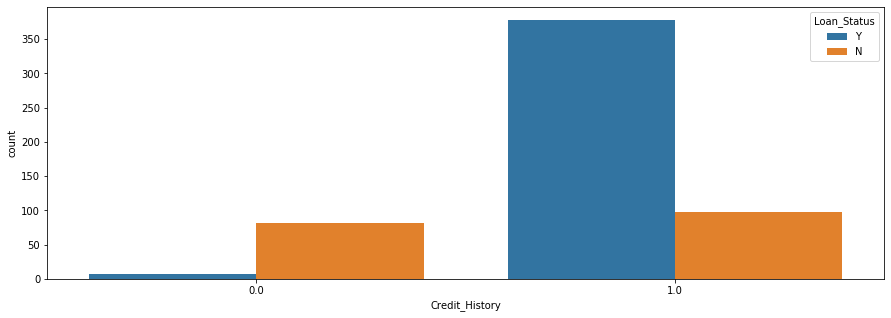

In [15]:
plt.figure(figsize=(15,5))
sb.countplot(x='Credit_History', hue='Loan_Status', data=df_loan);

In [16]:
# Married -> As seen as above, we prefer to choose have credit history as filled value, beside that one is modus value.
df_loan['Credit_History'] = df_loan['Credit_History'].fillna(df_loan['Credit_History'].mode()[0])
df_loan['Credit_History'].isnull().any()

False

### Categorical Data Handling NaN

In [17]:
# Gender -> many NaN value between Male, and many Female are between Male, so we will fill with Female
df_loan['Gender'] = df_loan['Gender'].fillna('Female')
df_loan['Gender'].isnull().any()

False

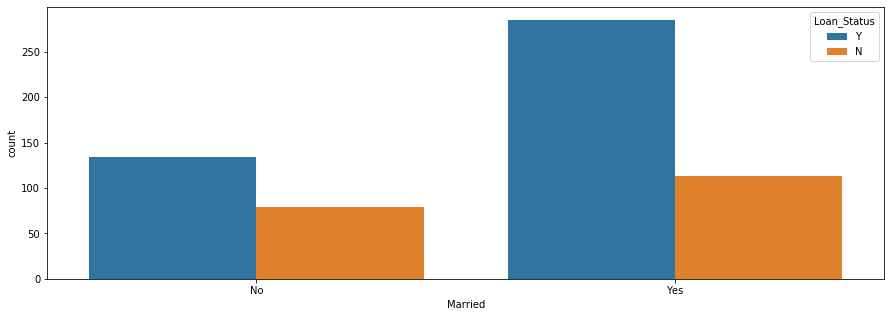

In [18]:
plt.figure(figsize=(15,5))
sb.countplot(x='Married', hue='Loan_Status', data=df_loan);

### Married people get more chance to be accepted 

In [19]:
# Married -> As seen as above, we prefer to choose married as filled value, beside that Married is modus value.
df_loan['Married'] = df_loan['Married'].fillna(df_loan['Married'].mode()[0])
df_loan['Married'].isnull().any()

False

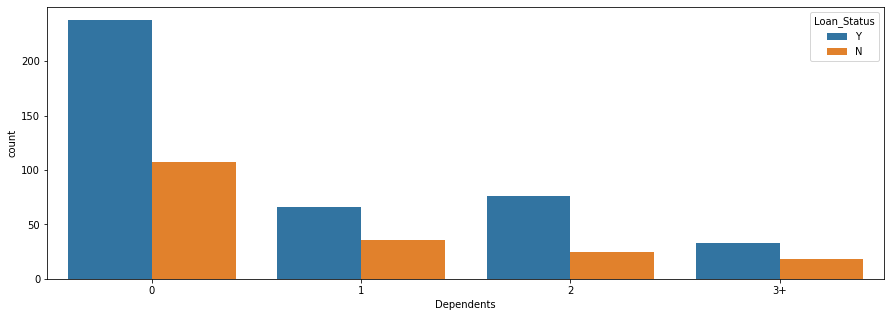

In [20]:
plt.figure(figsize=(15,5))
sb.countplot(x='Dependents', hue='Loan_Status', data=df_loan);

In [21]:
# Dependents -> As seen as above, no one of any dependents make more chance on loan approved. We choose to fill NaN with 0 (modus)
df_loan['Dependents'] = df_loan['Dependents'].fillna(df_loan['Dependents'].mode()[0])
df_loan['Dependents'].isnull().any()

False

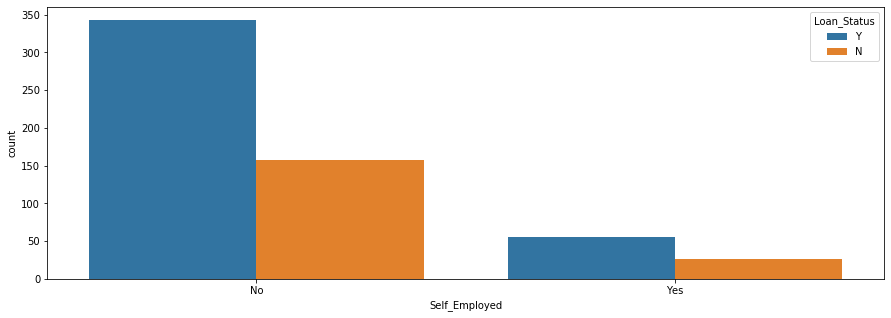

In [22]:
plt.figure(figsize=(15,5))
sb.countplot(x='Self_Employed', hue='Loan_Status', data=df_loan);

In [23]:
# Self Employed -> As seen as above, there's no guarantee that self employed get more chance on loan approved. We choose to fill NaN with No (modus)
df_loan['Self_Employed'] = df_loan['Self_Employed'].fillna(df_loan['Self_Employed'].mode()[0])
df_loan['Self_Employed'].isnull().any()

False

In [24]:
df_loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Label Encoder

In [25]:
exe = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
for i in exe:
    df_loan[i]= df_loan[i].astype('str')

for i in exe:
    df_loan[i] = LabelEncoder().fit_transform(df_loan[i])

df_loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1


## Correlation

In [26]:
df_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


In [27]:
# Correlation Continuous Data
con = df_loan.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area'], axis=1)
con

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,5849,0.0,120.0,360.0,1
1,4583,1508.0,128.0,360.0,0
2,3000,0.0,66.0,360.0,1
3,2583,2358.0,120.0,360.0,1
4,6000,0.0,141.0,360.0,1
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1
610,4106,0.0,40.0,180.0,1
611,8072,240.0,253.0,360.0,1
612,7583,0.0,187.0,360.0,1


Text(0.5, 0.98, 'Correlation Continuous Data with Loan Status')

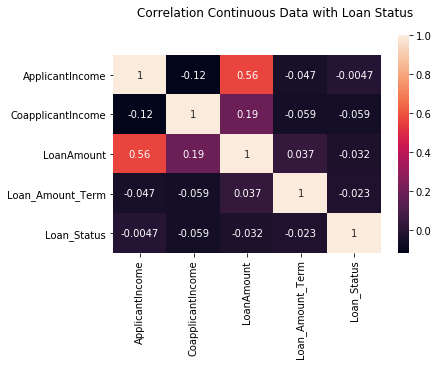

In [28]:
corCon = con.corr(method='pearson')
sb.heatmap(corCon, annot=True)
plt.ylim(5,-0.5)
plt.suptitle('Correlation Continuous Data with Loan Status')

### There's no strong correlation

In [29]:
ordi = df_loan.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
ordi

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1,2,1
1,1,1,1,0,0,1,0,0
2,1,1,0,0,1,1,2,1
3,1,1,0,1,0,1,2,1
4,1,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,0,1
610,1,1,3,0,0,1,0,1
611,1,1,1,0,0,1,2,1
612,1,1,2,0,0,1,2,1


Text(0.5, 0.98, 'Correlation Ordinal Data with Loan Status')

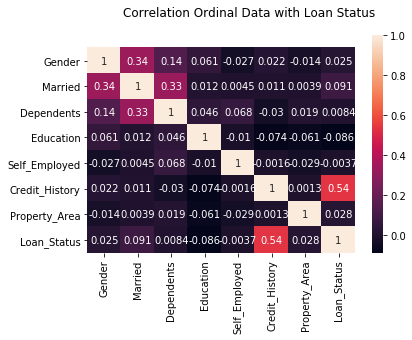

In [30]:
corOrdi = ordi.corr(method='kendall')
sb.heatmap(corOrdi, annot=True)
plt.ylim(8,-0.5)
plt.suptitle('Correlation Ordinal Data with Loan Status')

### It just Credit History that shows strong correlation

### So, how we choose what features will use in trainning data? Should we just take Credit History?
### As I show before about scatter bar, we can see the pattern of decision there 

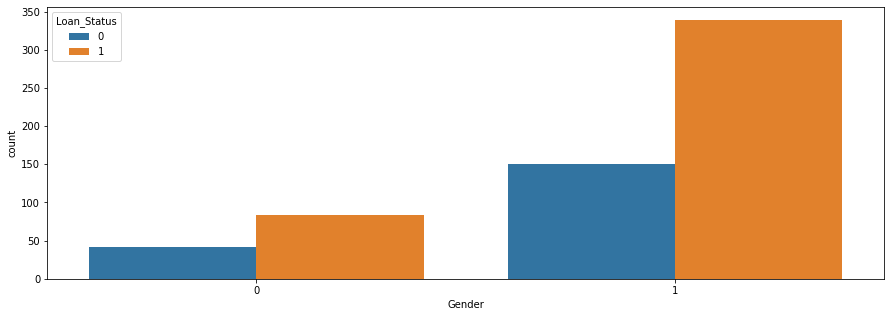

In [31]:
# GENDER
plt.figure(figsize=(15,5))
sb.countplot(x='Gender', hue='Loan_Status', data=df_loan)

### Male (1) has bigger chance to get approved, even it doesn't mean that Female (0) will be disapproved. I put Male and Famele on the same Equality Gender.
### NOT GOOD FEATURE

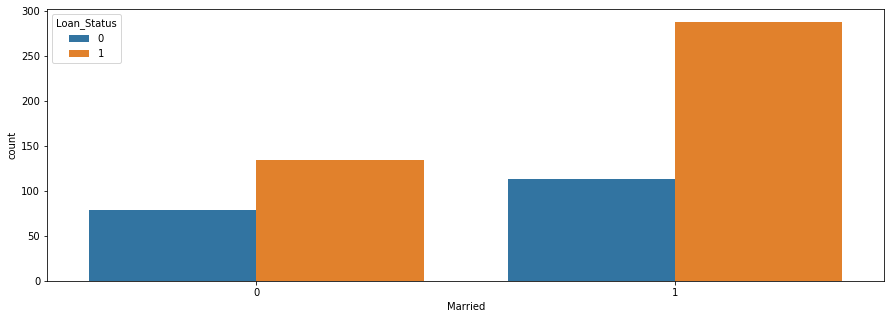

In [32]:
# MARRIED
plt.figure(figsize=(15,5))
sb.countplot(x='Married', hue='Loan_Status', data=df_loan);

### Married (1) has bigger chance to get approved, besides that no married (0) means that smaller chance will be disapproved.
### GOOD FEATURE

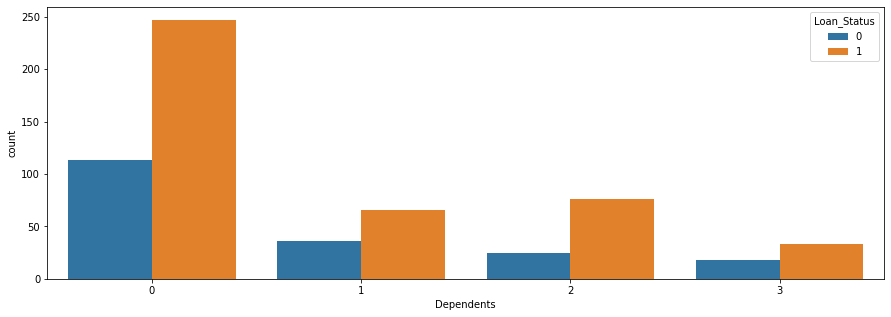

In [33]:
# DEPENDENTS
plt.figure(figsize=(15,5))
sb.countplot(x='Dependents', hue='Loan_Status', data=df_loan);

### Independent (0) has bigger chance to get approved, besides that most number of dependents (3) means that smallest chance will be disapproved.
### GOOD FEATURE

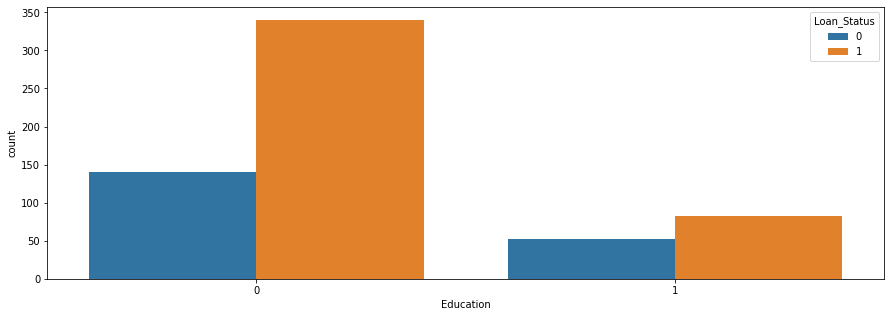

In [34]:
# EDUCATION
plt.figure(figsize=(15,5))
sb.countplot(x='Education', hue='Loan_Status', data=df_loan);

### Graduate (0) has bigger chance to get approved, even it doesn't mean that Non Graduate (1) will be disapproved.
### NOT BAD FEATURE

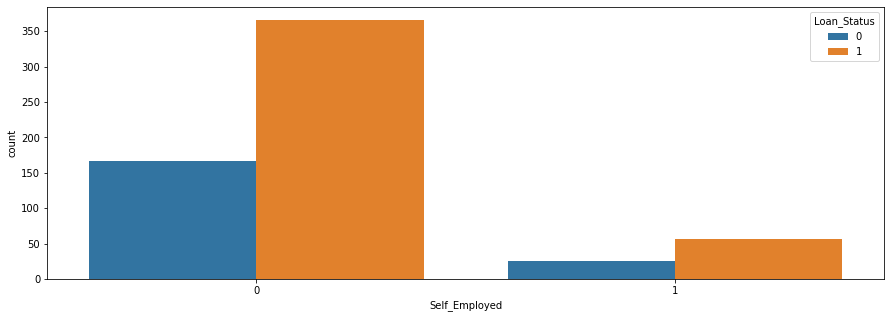

In [35]:
# SELF EMPLOYED
plt.figure(figsize=(15,5))
sb.countplot(x='Self_Employed', hue='Loan_Status', data=df_loan);

### Self Employed is not guarantee to be approved
### NOT GOOD FEATURE

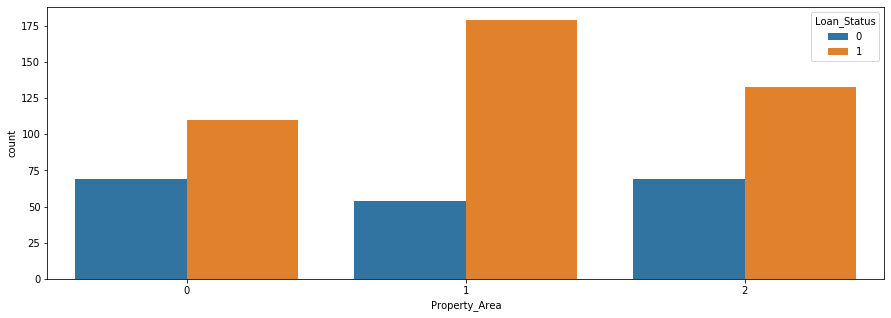

In [36]:
# PROPERTY AREA
plt.figure(figsize=(15,5))
sb.countplot(x='Property_Area', hue='Loan_Status', data=df_loan);

### Semiurban (1) get more than 50% chance to be approved than others Rural (0) and Urban (2)
### GOOD FEATURE

### Numeric Data

Text(0, 0.5, 'Count')

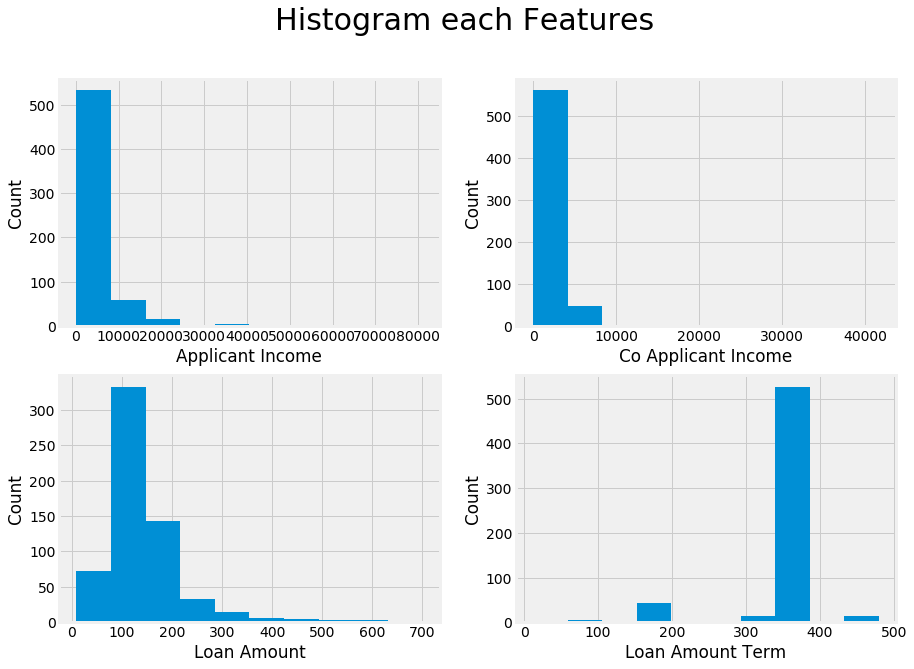

In [37]:
plt.figure(figsize=(15,10))
plt.style.use("fivethirtyeight")
plt.suptitle("Histogram each Features", fontsize=30)

plt.subplot(221)
df_loan['ApplicantIncome'].hist()
plt.xlabel('Applicant Income')
plt.ylabel('Count')

plt.subplot(222)
df_loan['CoapplicantIncome'].hist()
plt.xlabel('Co Applicant Income')
plt.ylabel('Count')

plt.subplot(223)
df_loan['LoanAmount'].hist()
plt.xlabel('Loan Amount')
plt.ylabel('Count')

plt.subplot(224)
df_loan['Loan_Amount_Term'].hist()
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')

Text(0, 0.5, 'Density')

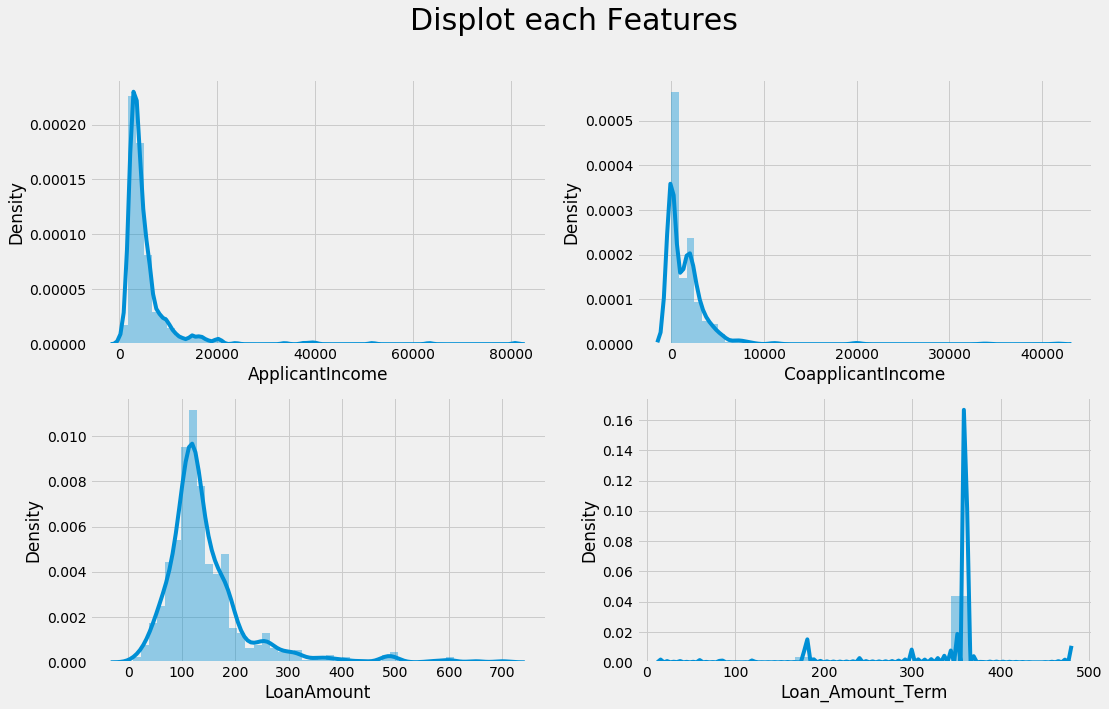

In [38]:
plt.figure(figsize=(16,10))
plt.suptitle("Displot each Features", fontsize=30)

plt.subplot(221)
sb.distplot(df_loan['ApplicantIncome'])
plt.ylabel("Density")

plt.subplot(222)
sb.distplot(df_loan['CoapplicantIncome'])
plt.ylabel("Density")

plt.subplot(223)
sb.distplot(df_loan['LoanAmount'])
plt.ylabel("Density")

plt.subplot(224)
sb.distplot(df_loan['Loan_Amount_Term'])
plt.ylabel("Density")

### It can be seen that all features are non-standard distribution.

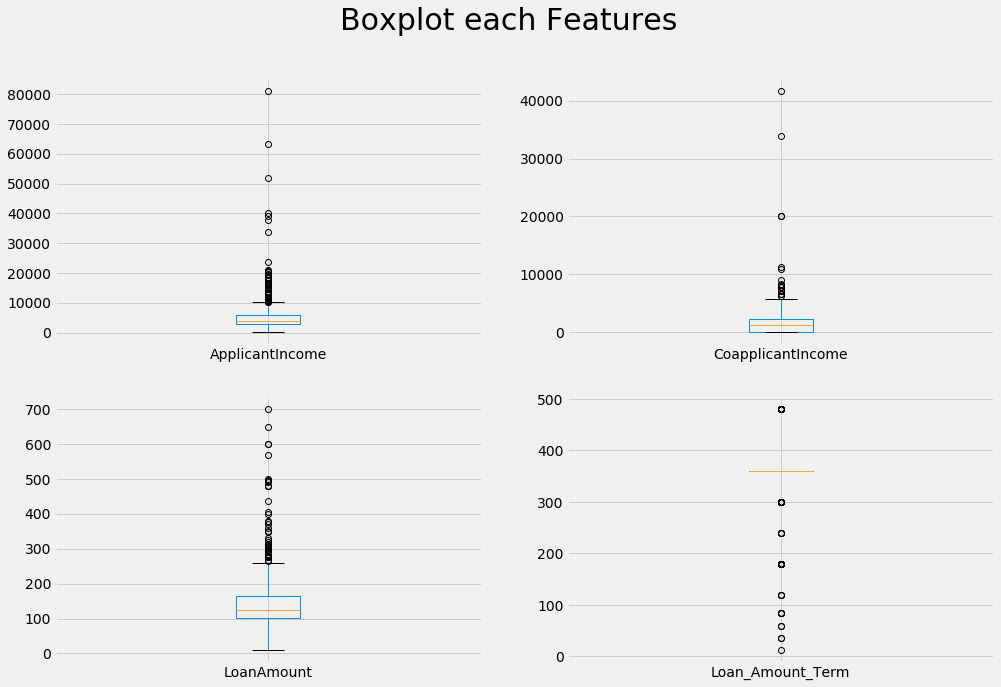

In [39]:
plt.figure(figsize=(15,10))
plt.suptitle("Boxplot each Features", fontsize=30)

plt.subplot(221)
df_loan['ApplicantIncome'].plot.box()

plt.subplot(222)
df_loan['CoapplicantIncome'].plot.box()

plt.subplot(223)
df_loan['LoanAmount'].plot.box()

plt.subplot(224)
df_loan['Loan_Amount_Term'].plot.box()

plt.show()

### Too many outliers in each feature. I leave this data as is.
### I will group the data above into several categories to link with loan status.

In [40]:
df_loan.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.796417,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.465798,342.410423,0.855049,1.037459,0.687296
std,0.402991,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [41]:
# Applicant Income
cat = [0, 2850,3800,5800]
clust = ['Low', 'Middle', 'High']

In [42]:
df_loan['Income_Cluster'] = pd.cut(df_loan['ApplicantIncome'], cat, labels= clust)
Income_Cluster = pd.crosstab(df_loan['Income_Cluster'], df_loan['Loan_Status'])
Income_Cluster

Loan_Status,0,1
Income_Cluster,,
Low,47,104
Middle,49,106
High,47,108


Text(0, 0.5, 'Scale')

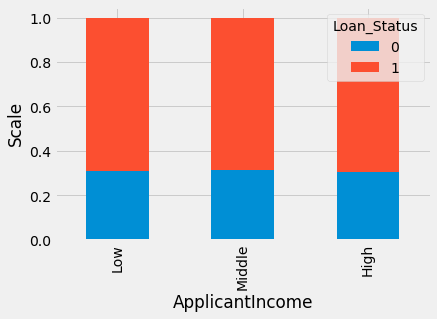

In [43]:
Income_Cluster.div(Income_Cluster.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Scale')

### Income categorization have comparisons of revenue and rejection which tends to be the same

In [44]:
# Co Applicant Income
cat_co = [0, 500,1150,2300]

In [45]:
df_loan['CoIncome_Cluster'] = pd.cut(df_loan['CoapplicantIncome'], cat_co, labels= clust)
CoIncome_Cluster = pd.crosstab(df_loan['CoIncome_Cluster'], df_loan['Loan_Status'])
CoIncome_Cluster

Loan_Status,0,1
CoIncome_Cluster,,
Low,0,6
Middle,3,24
High,45,109


Text(0, 0.5, 'Scale')

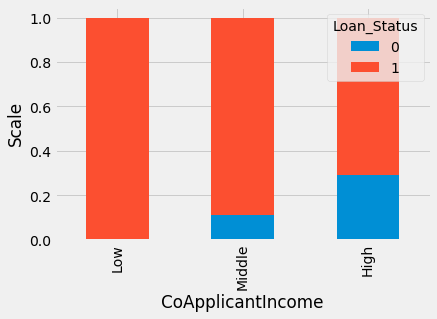

In [46]:
CoIncome_Cluster.div(CoIncome_Cluster.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoApplicantIncome')
plt.ylabel('Scale')

### Dependents that no apply co applicant or independesnts have more chance to be approved. 
### There is a possibility that the coapplicant is not received high or very high because the applicant's income is very small or other factors related to other features.

### Bad score I've already got before make me take another alternate to get better result. Improving model by combine Applicant and Co Applicant Income is the one.

In [47]:
df_loan['Total_Income'] = df_loan['ApplicantIncome'] + df_loan['CoapplicantIncome']

Text(0, 0.5, 'Density')

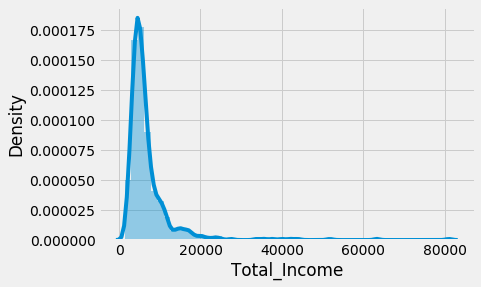

In [48]:
sb.distplot(df_loan['Total_Income'])
plt.ylabel("Density")

In [49]:
df_loan['Total_Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_Income, dtype: float64

In [50]:
cat_tot = [0, 4150, 5400, 7500]

In [51]:
df_loan['Total_Cluster'] = pd.cut(df_loan['Total_Income'], cat_tot, labels= clust)
Total_Cluster = pd.crosstab(df_loan['Total_Cluster'], df_loan['Loan_Status'])
Total_Cluster

Loan_Status,0,1
Total_Cluster,,
Low,47,103
Middle,51,105
High,44,110


Text(0, 0.5, 'Scale')

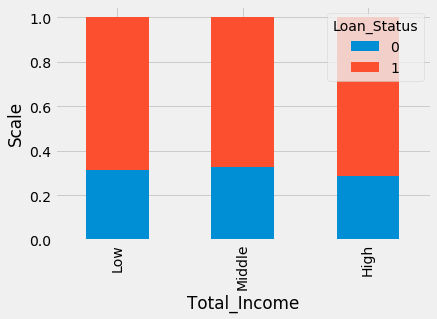

In [52]:
Total_Cluster.div(Total_Cluster.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Scale')

### Total Income categorization have comparisons of revenue and rejection which tends to be the same. It caused by coApplicant value that commonly are not as big as Apllicant Income.

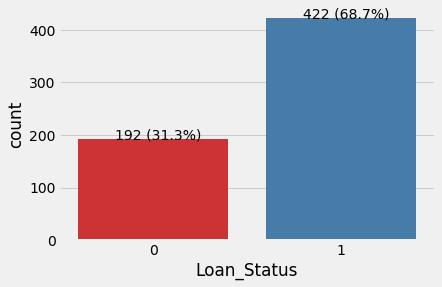

In [53]:
ax = sb.countplot(df_loan['Loan_Status'], palette='Set1')
for i in ax.patches:
    ax.annotate('{} ({:.1f}%)'.format(i.get_height(), 100* i.get_height()/len(df_loan['Loan_Status'])), (i.get_x()+0.2, i.get_height()+0.5)) 

### We can see that the dataset is imbalance data

## - Standart Scaler

In [54]:
df_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Cluster,CoIncome_Cluster,Total_Income,Total_Cluster
0,1,0,0,0,0,5849,0.0,120.0,360.0,1,2,1,NaN,NaN,5849.0,High
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0,High,High,6091.0,High
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1,Middle,NaN,3000.0,Low
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1,Low,NaN,4941.0,Middle
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1,NaN,NaN,6000.0,High


In [55]:
con_n = df_loan.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area','ApplicantIncome','CoapplicantIncome','Income_Cluster','CoIncome_Cluster','Total_Cluster','Loan_Status'], axis=1)
con_n

,LoanAmount,Loan_Amount_Term,Total_Income
0,120.0,360.0,5849.0
1,128.0,360.0,6091.0
2,66.0,360.0,3000.0
3,120.0,360.0,4941.0
4,141.0,360.0,6000.0
...,...,...,...
609,71.0,360.0,2900.0
610,40.0,180.0,4106.0
611,253.0,360.0,8312.0
612,187.0,360.0,7583.0


In [56]:
norm = Normalizer()
norm_fit = norm.fit(con_n)
norm_tf = norm_fit.transform(con_n)
norm_tf

array([[0.02047328, 0.06141985, 0.99790202],
       [0.02097339, 0.05898766, 0.99803836],
       [0.02183808, 0.11911681, 0.99264006],
       ...,
       [0.03039536, 0.04325032, 0.99860179],
       [0.02462521, 0.04740682, 0.99857208],
       [0.02891907, 0.07827719, 0.9965121 ]])

In [57]:
df_norm = pd.DataFrame(norm_tf, columns=['LoanAmount', 'LoanAmountTerm','TotalIncome'])
df_norm

,LoanAmount,LoanAmountTerm,TotalIncome
0,0.020473,0.061420,0.997902
1,0.020973,0.058988,0.998038
2,0.021838,0.119117,0.992640
3,0.024215,0.072646,0.997064
4,0.023451,0.059876,0.997930
...,...,...,...
609,0.024289,0.123156,0.992090
610,0.009732,0.043794,0.998993
611,0.030395,0.043250,0.998602
612,0.024625,0.047407,0.998572


In [58]:
df_training = pd.concat([df_norm, ordi], axis=1)
df_training 

,LoanAmount,LoanAmountTerm,TotalIncome,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,0.020473,0.061420,0.997902,1,0,0,0,0,1,2,1
1,0.020973,0.058988,0.998038,1,1,1,0,0,1,0,0
2,0.021838,0.119117,0.992640,1,1,0,0,1,1,2,1
3,0.024215,0.072646,0.997064,1,1,0,1,0,1,2,1
4,0.023451,0.059876,0.997930,1,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0.024289,0.123156,0.992090,0,0,0,0,0,1,0,1
610,0.009732,0.043794,0.998993,1,1,3,0,0,1,0,1
611,0.030395,0.043250,0.998602,1,1,1,0,0,1,2,1
612,0.024625,0.047407,0.998572,1,1,2,0,0,1,2,1


## Splitting

In [59]:
x = df_training.drop(['Gender', 'Self_Employed', 'Loan_Status'], axis=1)
y = df_training['Loan_Status']

In [60]:
xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.15, random_state=3)

print(xtr.shape)
print(xts.shape)
print(ytr.shape)
print(yts.shape)

(521, 8)
(93, 8)
(521,)
(93,)


In [61]:
print(len(ytr[ytr==0]))
print(len(ytr[ytr==1]))

173
348


In [62]:
Yes = df_loan[df_loan['Loan_Status']==1]
No = df_loan[df_loan['Loan_Status']==0]

print(Yes.shape)
print(No.shape)

(422, 16)
(192, 16)


In [63]:
train = pd.concat([xtr, ytr], axis=1)
train

,LoanAmount,LoanAmountTerm,TotalIncome,Married,Dependents,Education,Credit_History,Property_Area,Loan_Status
276,0.028439,0.049458,0.998371,1,0,0,1,1,1
159,0.024957,0.035234,0.999067,1,0,0,1,1,1
91,0.015789,0.015117,0.999761,1,2,0,1,1,1
565,0.026767,0.080302,0.996411,1,0,1,1,0,1
144,0.015902,0.015306,0.999756,1,2,0,1,2,1
...,...,...,...,...,...,...,...,...,...
480,0.035260,0.082425,0.995973,0,0,1,1,0,1
422,0.028100,0.101161,0.994473,1,0,0,1,2,1
119,0.024862,0.034557,0.999093,0,0,0,1,2,1
256,0.018987,0.059437,0.998051,0,0,1,0,0,0


In [64]:
yes = train[train['Loan_Status']==1]
no = train[train['Loan_Status']==0]

print(yes.shape)
print(no.shape)

(348, 9)
(173, 9)


In [65]:
#unsample yes to no
yes_resampled = resample(yes,
                            replace=True,
                            n_samples=len(no),
                            random_state=True)
len(yes_resampled)

173

In [66]:
yes_resampled

,LoanAmount,LoanAmountTerm,TotalIncome,Married,Dependents,Education,Credit_History,Property_Area,Loan_Status
512,0.027756,0.067514,0.997332,1,2,0,1,2,1
198,0.018099,0.057661,0.998172,1,0,0,1,1,1
595,0.028561,0.093472,0.995212,0,0,1,1,0,1
491,0.028718,0.055584,0.998041,1,1,1,1,2,1
278,0.029875,0.024668,0.999249,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...
398,0.019532,0.064508,0.997726,0,0,1,1,0,1
279,0.030114,0.087429,0.995715,1,0,1,1,0,1
343,0.023167,0.112704,0.993359,1,3,1,1,1,1
55,0.024917,0.092476,0.995403,1,2,0,1,1,1


In [67]:
resampled = pd.concat([no, yes_resampled])
resampled

,LoanAmount,LoanAmountTerm,TotalIncome,Married,Dependents,Education,Credit_History,Property_Area,Loan_Status
328,0.016190,0.052985,0.998464,1,0,0,1,2,0
573,0.024076,0.061799,0.997798,1,2,1,1,1,0
209,0.036927,0.104674,0.993821,0,0,0,1,1,0
597,0.029237,0.119605,0.992391,0,0,0,0,1,0
293,0.026286,0.088234,0.995753,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...
398,0.019532,0.064508,0.997726,0,0,1,1,0,1
279,0.030114,0.087429,0.995715,1,0,1,1,0,1
343,0.023167,0.112704,0.993359,1,3,1,1,1,1
55,0.024917,0.092476,0.995403,1,2,0,1,1,1


In [68]:
x_tr = resampled.drop(['Loan_Status'], axis=1)
y_tr = resampled['Loan_Status']

## DATA MODELLING

### Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently. This assumption simplifies computation, and that's why it is considered as naive. This assumption is called class conditional independence.

### - Gaussian Naive Bayes 

In [69]:
gnb = GaussianNB()

In [70]:
gnbDef_res = gnb.fit(x_tr,y_tr)
gnbDef_tts = gnb.fit(xtr,ytr)

In [71]:
#Score Default GNB (resampled)
gnbScore_train_res = round(gnbDef_res.score(x_tr,y_tr)*100,2)
gnbScore_test_res = round(gnbDef_res.score(xts,yts)*100,2)

print(f'Gaussian NB train score (res): {gnbScore_train_res} %')
print(f'Gaussian NB test score (res): {gnbScore_test_res} %')

Gaussian NB train score (res): 71.1 %
Gaussian NB test score (res): 82.8 %


In [72]:
#Score Default GNB (resampled)
gnbScore_train_tts = round(gnbDef_tts.score(xtr,ytr)*100,2)
gnbScore_test_tts = round(gnbDef_tts.score(xts,yts)*100,2)

print(f'Gaussian NB train score (tts): {gnbScore_train_tts} %')
print(f'Gaussian NB test score (tts): {gnbScore_test_tts} %')

Gaussian NB train score (tts): 79.46 %
Gaussian NB test score (tts): 82.8 %


### - Complement Naive Bayes

In [73]:
cnb = ComplementNB()

In [74]:
cnbDef_res = cnb.fit(x_tr,y_tr)
cnbDef_tts = cnb.fit(xtr,ytr)

In [75]:
#Score Default GNB (resampled)
cnbScore_train_res = round(cnbDef_res.score(x_tr,y_tr)*100,2)
cnbScore_test_res = round(cnbDef_res.score(xts,yts)*100,2)

print(f'Complement NB train score (res): {cnbScore_train_res} %')
print(f'Complement NB test score (res): {cnbScore_test_res} %')

Complement NB train score (res): 68.5 %
Complement NB test score (res): 74.19 %


In [76]:
#Score Default GNB (resampled)
cnbScore_train_tts = round(cnbDef_tts.score(xtr,ytr)*100,2)
cnbScore_test_tts = round(cnbDef_tts.score(xts,yts)*100,2)

print(f'Complement NB train score (tts): {cnbScore_train_tts} %')
print(f'Complement NB test score (tts): {cnbScore_test_tts} %')

Complement NB train score (tts): 71.79 %
Complement NB test score (tts): 74.19 %


### From two models above, train_test_split method has better performance, so it will continuous with that one.

### - Logistic Regression

In [77]:
lrDef = LogisticRegression().fit(xtr, ytr)
lrDef

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
#Score Default LR
lr_train_score = round(lrDef.score(xtr,ytr)*100,2)
lr_test_score = round(lrDef.score(xts,yts)*100,2)

print(f'Default LR Train Score: {lr_train_score} %')
print(f'Default LR Test Score: {lr_test_score} %')

Default LR Train Score: 79.65 %
Default LR Test Score: 88.17 %


In [79]:
#Logistic Regression Parameter
penalty = ['l1','l2','elasticnet','none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = np.arange(10,1000)
# c = np.logspace(0.1,10,20)
verbose = [1,2]
multi_class = ['auto', 'ovr', 'multinominal']
paramLR = {
    'penalty': penalty, 'solver': solver, 'max_iter': max_iter, 'multi_class': multi_class, 'verbose': verbose, 'multi_class': multi_class
}

In [80]:
lr = LogisticRegression()
rsLR = RandomizedSearchCV(estimator=lr, param_distributions=paramLR, cv=10, n_iter=10, random_state=3)
rsLR.fit(xtr,ytr)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'ma...
       972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984,
       985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997,
       998, 999]),
                                        'multi_class': ['auto', 'ovr',

In [81]:
rsLR.best_params_

{'verbose': 1,
 'solver': 'newton-cg',
 'penalty': 'l2',
 'multi_class': 'auto',
 'max_iter': 606}

In [82]:
#Logistic Regression Best Parameters
lrRS = LogisticRegression(verbose=1, solver='newton-cg', penalty='l2', multi_class='auto', max_iter=606)
lrRS.fit(xtr,ytr)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=606,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=1,
                   warm_start=False)

In [83]:
#Score Randomized LR
lrRS_train_score = round(lrRS.score(x_tr,y_tr)*100,2)
lrRS_test_score = round(lrRS.score(xts,yts)*100,2)

print(f'Hyperparameter Logistic Regression Train Score: {lrRS_train_score} %')
print(f'Hyperparameter Logistic Regression Test Score: {lrRS_test_score} %')

Hyperparameter Logistic Regression Train Score: 70.23 %
Hyperparameter Logistic Regression Test Score: 88.17 %


### - KNearest Classifier 

In [84]:
#Default KNN
kncDef = KNeighborsClassifier().fit(xtr, ytr)
kncDef

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [85]:
#Score Default KNC
knc_train_score = round(kncDef.score(x_tr,y_tr)*100,2)
knc_test_score = round(kncDef.score(xts,yts)*100,2)

print(f'Default KNC Train Score: {knc_train_score} %')
print(f'Default KNC Test Score: {knc_test_score} %')

Default KNC Train Score: 73.7 %
Default KNC Test Score: 82.8 %


In [86]:
#parameter KNN
n_neighbors = np.arange(1,51,2)
leaf_size = np.arange(51)
weights = ['uniform','distance']  
algorithm = ['auto','ball_tree','kd_tree','brute']
p = [1,2]
paramKNN = {
    'n_neighbors': n_neighbors, 'leaf_size': leaf_size, 'algorithm': algorithm, 'weights': weights, 'p': p
    }
paramKNN


{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39, 41, 43, 45, 47, 49]),
 'leaf_size': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'weights': ['uniform', 'distance'],
 'p': [1, 2]}

In [87]:
rsKNC = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=paramKNN, cv=15, n_iter=15, random_state=21)
rsKNC.fit(xtr,ytr)

RandomizedSearchCV(cv=15, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                                        '

In [88]:
rsKNC.best_params_

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 13,
 'leaf_size': 19,
 'algorithm': 'brute'}

In [89]:
kncRS = KNeighborsClassifier(weights= 'uniform', p=1, n_neighbors=13, leaf_size=19, algorithm='brute')
kncRS.fit(xtr,ytr)

KNeighborsClassifier(algorithm='brute', leaf_size=19, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=1,
                     weights='uniform')

In [90]:
#Score RS KNC
kncRS_train_score = round(kncRS.score(xtr,ytr)*100,2)
kncRS_test_score = round(kncRS.score(xts,yts)*100,2)

print(f'Hyperparameter KNC Train Score: {kncRS_train_score} %')
print(f'Hyperparameter KNC Test Score: {kncRS_test_score} %')

Hyperparameter KNC Train Score: 78.31 %
Hyperparameter KNC Test Score: 87.1 %


### - Random Forest Classifier

In [91]:
#Default Random Forest
rfcDef = RandomForestClassifier(random_state=True).fit(xtr,ytr)
rfcDef

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=True,
                       verbose=0, warm_start=False)

In [92]:
#Score Default RFC
rfc_train_score = round(rfcDef.score(xtr,ytr)*100,2)
rfc_test_score = round(rfcDef.score(xts,yts)*100,2)

print(f'Default Random Forest Train Score: {rfc_train_score} %')
print(f'Default Random Forest Test Score: {rfc_test_score} %')

Default Random Forest Train Score: 100.0 %
Default Random Forest Test Score: 84.95 %


### I am not trying randomized search for RFC, cause it take too long execute time, and I must repeat many times all of this cells.
### Eventhough it can't be seen as reference, but in my experience before, Randomizes search RFC is worse than default one.

### - Support Vector Machine

In [93]:
#Default Random Forest
svcDef = SVC(random_state=True).fit(xtr,ytr)
svcDef

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=True, shrinking=True,
    tol=0.001, verbose=False)

In [94]:
#Score Default SVC
svc_train_score = round(svcDef.score(xtr,ytr)*100,2)
svc_test_score = round(svcDef.score(xts,yts)*100,2)

print(f'Default SVC Train Score: {svc_train_score} %')
print(f'Default SVC Test Score: {svc_test_score} %')

Default SVC Train Score: 79.65 %
Default SVC Test Score: 88.17 %


### From six models above, just Random Forest Classifier is not underfitting.
### Better performance with hyperparameter tuning just happen in KNC model.

## EVALUATION METRICS

### Cross Validation

In [95]:
# Gaussian Naive Bayes
scorecvGNB0 = cross_val_score(gnbDef_tts, xtr, ytr, cv=10)
cvGNB_mean0 = round(np.mean(scorecvGNB0*100),2)
print(scorecvGNB0)
print(cvGNB_mean0)

[0.77358491 0.86538462 0.82692308 0.82692308 0.76923077 0.71153846
 0.80769231 0.88461538 0.73076923 0.76923077]
79.66


In [96]:
# Complement Naive Bayes
scorecvCNB0 = cross_val_score(cnbDef_tts, xtr, ytr, cv=10)
cvCNB_mean0 = round(np.mean(scorecvCNB0*100),2)
print(scorecvGNB0)
print(cvGNB_mean0)

[0.77358491 0.86538462 0.82692308 0.82692308 0.76923077 0.71153846
 0.80769231 0.88461538 0.73076923 0.76923077]
79.66


In [97]:
# Logistic Regression
scorecvLR0 = cross_val_score(lrDef, xtr, ytr, cv=10)
cvLR_mean0 = round(np.mean(scorecvLR0*100),2)
print(scorecvLR0)
print(cvLR_mean0)

[0.75471698 0.86538462 0.80769231 0.82692308 0.73076923 0.76923077
 0.84615385 0.84615385 0.75       0.76923077]
79.66


In [98]:
# KNearest Neighbors
scorecvKNC0 = cross_val_score(kncRS, xtr, ytr, cv=10)
cvKNC_mean0 = round(np.mean(scorecvKNC0*100),2)
print(scorecvKNC0)
print(cvKNC_mean0)

[0.77358491 0.78846154 0.78846154 0.78846154 0.71153846 0.75
 0.84615385 0.80769231 0.73076923 0.76923077]
77.54


In [99]:
# Random Forest Classifier
scorecvRFC0 = cross_val_score(rfcDef, xtr, ytr, cv=10)
cvRFC_mean0 = round(np.mean(scorecvRFC0*100),2)
print(scorecvRFC0)
print(cvRFC_mean0)

[0.81132075 0.84615385 0.84615385 0.76923077 0.73076923 0.71153846
 0.80769231 0.82692308 0.73076923 0.76923077]
78.5


In [100]:
# Support Vector Machine
scorecvSVC0 = cross_val_score(svcDef, xtr, ytr, cv=10)
cvSVC_mean0 = round(np.mean(scorecvSVC0*100),2)
print(scorecvSVC0)
print(cvSVC_mean0)

[0.75471698 0.86538462 0.80769231 0.82692308 0.73076923 0.76923077
 0.84615385 0.84615385 0.75       0.76923077]
79.66


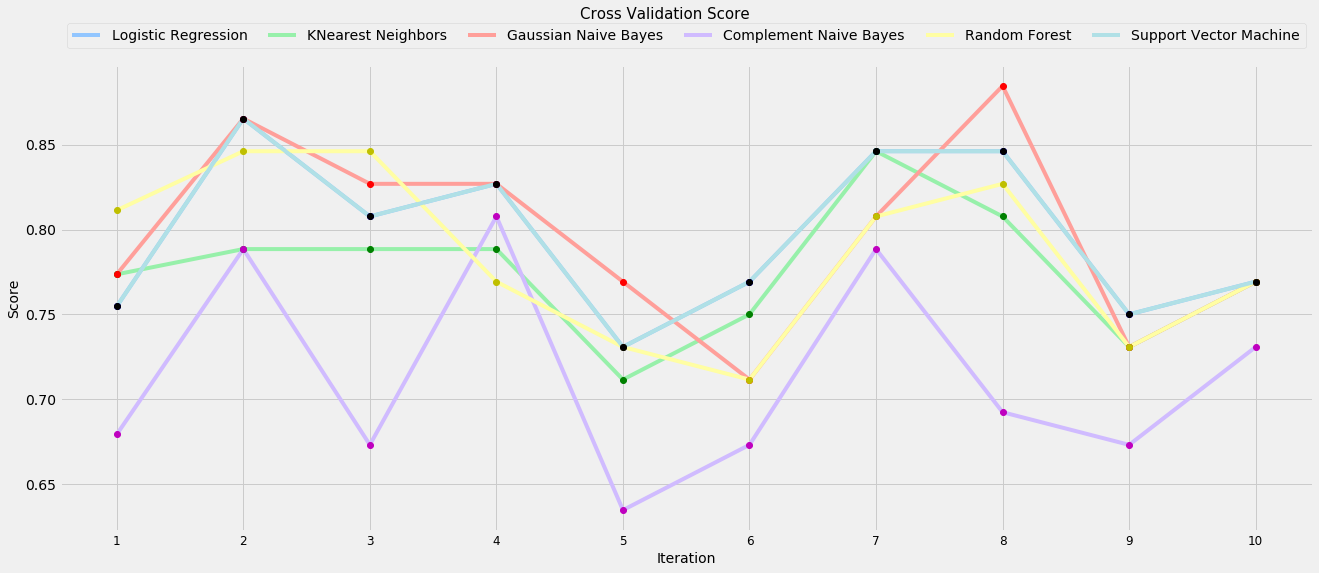

In [101]:
iterasi = [*range(1,11,1)]
plt.style.use('seaborn-pastel')
plt.figure('Cross Validation',figsize=(20,8))
plt.grid('True')
plt.plot(iterasi,scorecvLR0,label='Logistic Regression')
plt.plot(iterasi,scorecvKNC0,label='KNearest Neighbors')
plt.plot(iterasi,scorecvGNB0,label='Gaussian Naive Bayes')
plt.plot(iterasi,scorecvCNB0,label='Complement Naive Bayes')
plt.plot(iterasi,scorecvRFC0,label='Random Forest')
plt.plot(iterasi,scorecvSVC0,label='Support Vector Machine')
plt.plot(iterasi,scorecvLR0,'bo')
plt.plot(iterasi,scorecvKNC0,'go')
plt.plot(iterasi,scorecvGNB0,'ro')
plt.plot(iterasi,scorecvCNB0,'mo')
plt.plot(iterasi,scorecvRFC0,'yo')
plt.plot(iterasi,scorecvSVC0,'ko')
plt.xlabel('Iteration',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.suptitle('Cross Validation Score',fontsize=15)
plt.xticks(iterasi,fontsize=12)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=6, mode="expand")

In [102]:
cols = ['Logistic Regression','KNearest Neighbors','Gaussian Naive Bayes','Complement Naive Bayes','Random Forest','Support Vector Machine']

In [103]:
dfCV = pd.DataFrame(
{"Classification Models" : cols,
"CV Score (%)" : [cvLR_mean0, cvKNC_mean0, cvGNB_mean0, cvCNB_mean0, cvRFC_mean0, cvSVC_mean0]},
index = [1,2,3,4,5,6])

In [104]:
dfCV = dfCV.sort_values('CV Score (%)')
dfCV

,Classification Models,CV Score (%)
4,Complement Naive Bayes,71.41
2,KNearest Neighbors,77.54
5,Random Forest,78.50
1,Logistic Regression,79.66
3,Gaussian Naive Bayes,79.66
6,Support Vector Machine,79.66


## Predict

In [105]:
ypLR = lrDef.predict(xts)
ypKNC = kncRS.predict(xts)
ypGNB = gnbDef_tts.predict(xts)
ypCNB = cnbDef_tts.predict(xts)
ypRFC = rfcDef.predict(xts)
ypSVC = svcDef.predict(xts)

In [106]:
# Logistic Regression
cmLR = confusion_matrix(yts, ypLR)
dfConLR = pd.DataFrame(cmLR, columns=['Pred. No','Pred. Yes'], index=['Act. No', 'Act. Yes'])
dfConLR

,Pred. No,Pred. Yes
Act. No,9,10
Act. Yes,1,73


In [107]:
tn_lr, fp_lr, fn_lr, tp_lr = confusion_matrix(yts, ypLR).ravel()
tn_lr, fp_lr, fn_lr, tp_lr

(9, 10, 1, 73)

In [108]:
# KNearest Neighbors
cmKNC = confusion_matrix(yts, ypKNC)
dfConKNC = pd.DataFrame(cmKNC, columns=['Pred. No','Pred. Yes'], index=['Act. No', 'Act. Yes'])
dfConKNC

,Pred. No,Pred. Yes
Act. No,8,11
Act. Yes,1,73


In [109]:
tn_knc, fp_knc, fn_knc, tp_knc = confusion_matrix(yts, ypKNC).ravel()
tn_knc, fp_knc, fn_knc, tp_knc

(8, 11, 1, 73)

In [110]:
# Gaussian Naive Bayes
cmGNB = confusion_matrix(yts, ypGNB)
dfConGNB = pd.DataFrame(cmGNB, columns=['Pred. No','Pred. Yes'], index=['Act. No', 'Act. Yes'])
dfConGNB

,Pred. No,Pred. Yes
Act. No,10,9
Act. Yes,7,67


In [111]:
tn_gnb, fp_gnb, fn_gnb, tp_gnb = confusion_matrix(yts, ypGNB).ravel()
tn_gnb, fp_gnb, fn_gnb, tp_gnb

(10, 9, 7, 67)

In [112]:
# Complement Naive Bayes
cmCNB = confusion_matrix(yts, ypCNB)
dfConCNB = pd.DataFrame(cmCNB, columns=['Pred. No','Pred. Yes'], index=['Act. No', 'Act. Yes'])
dfConCNB

,Pred. No,Pred. Yes
Act. No,11,8
Act. Yes,16,58


In [113]:
tn_cnb, fp_cnb, fn_cnb, tp_cnb = confusion_matrix(yts, ypCNB).ravel()
tn_cnb, fp_cnb, fn_cnb, tp_cnb

(11, 8, 16, 58)

In [114]:
# Random Forest Classifier
cmRFC = confusion_matrix(yts, ypRFC)
dfConRFC = pd.DataFrame(cmRFC, columns=['Pred. No','Pred. Yes'], index=['Act. No', 'Act. Yes'])
dfConRFC

,Pred. No,Pred. Yes
Act. No,11,8
Act. Yes,6,68


In [115]:
tn_rfc, fp_rfc, fn_rfc, tp_rfc = confusion_matrix(yts, ypRFC).ravel()
tn_rfc, fp_rfc, fn_rfc, tp_rfc

(11, 8, 6, 68)

In [116]:
# Support Vector Machine Classifier
cmSVC = confusion_matrix(yts, ypSVC)
dfConSVC = pd.DataFrame(cmSVC, columns=['Pred. No','Pred. Yes'], index=['Act. No', 'Act. Yes'])
dfConSVC

,Pred. No,Pred. Yes
Act. No,9,10
Act. Yes,1,73


In [117]:
tn_svc, fp_svc, fn_svc, tp_svc = confusion_matrix(yts, ypSVC).ravel()
tn_svc, fp_svc, fn_svc, tp_svc

(9, 10, 1, 73)

(2, -0.05)

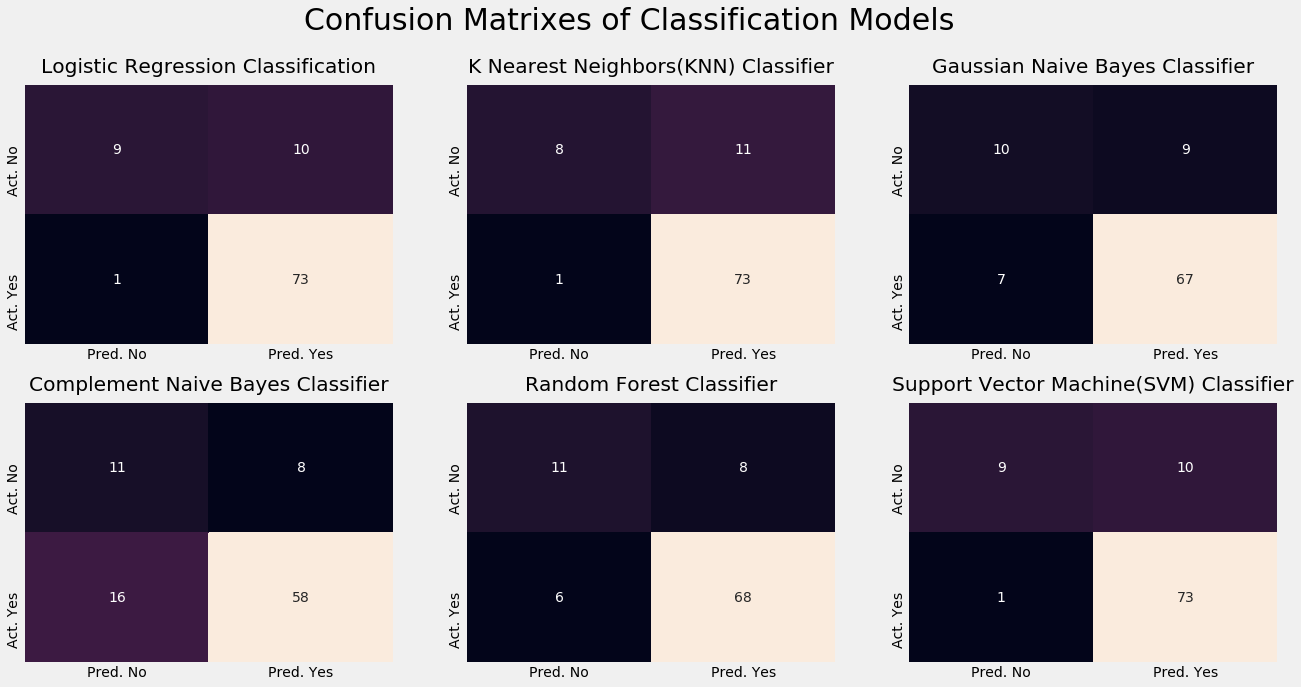

In [118]:
plt.figure(figsize=(20,10))
plt.suptitle("Confusion Matrixes of Classification Models",fontsize=30)

plt.subplot(231)
plt.title("Logistic Regression Classification")
sb.heatmap(dfConLR, annot=True, fmt='d', cbar=False)
plt.ylim(2,-0.05)

plt.subplot(232)
plt.title("K Nearest Neighbors(KNN) Classifier")
sb.heatmap(dfConKNC, annot=True, fmt='d', cbar=False)
plt.ylim(2,-0.05)

plt.subplot(233)
plt.title("Gaussian Naive Bayes Classifier")
sb.heatmap(dfConGNB, annot=True, fmt='d', cbar=False)
plt.ylim(2,-0.05)

plt.subplot(234)
plt.title("Complement Naive Bayes Classifier")
sb.heatmap(dfConCNB, annot=True, fmt='d', cbar=False)
plt.ylim(2,-0.05)

plt.subplot(235)
plt.title("Random Forest Classifier")
sb.heatmap(dfConRFC, annot=True, fmt='d', cbar=False)
plt.ylim(2,-0.05)

plt.subplot(236)
plt.title("Support Vector Machine(SVM) Classifier")
sb.heatmap(dfConSVC, annot=True, fmt='d', cbar=False)
plt.ylim(2,-0.05)

## Clasification Report

In [119]:
# Logistic Regression
crLR = classification_report(yts, ypLR)
print(crLR)

precision    recall  f1-score   support

           0       0.90      0.47      0.62        19
           1       0.88      0.99      0.93        74

    accuracy                           0.88        93
   macro avg       0.89      0.73      0.78        93
weighted avg       0.88      0.88      0.87        93



In [120]:
# K Nearest Neighbors
crKNC = classification_report(yts, ypKNC)
print(crKNC)

precision    recall  f1-score   support

           0       0.89      0.42      0.57        19
           1       0.87      0.99      0.92        74

    accuracy                           0.87        93
   macro avg       0.88      0.70      0.75        93
weighted avg       0.87      0.87      0.85        93



In [121]:
# Gaussian Naive Bayes
crGNB = classification_report(yts, ypGNB)
print(crGNB)

precision    recall  f1-score   support

           0       0.59      0.53      0.56        19
           1       0.88      0.91      0.89        74

    accuracy                           0.83        93
   macro avg       0.73      0.72      0.72        93
weighted avg       0.82      0.83      0.82        93



In [122]:
# Complement Naive Bayes
crCNB = classification_report(yts, ypCNB)
print(crCNB)

precision    recall  f1-score   support

           0       0.41      0.58      0.48        19
           1       0.88      0.78      0.83        74

    accuracy                           0.74        93
   macro avg       0.64      0.68      0.65        93
weighted avg       0.78      0.74      0.76        93



In [123]:
# Random Forest Classifier
crRFC = classification_report(yts, ypRFC)
print(crRFC)

precision    recall  f1-score   support

           0       0.65      0.58      0.61        19
           1       0.89      0.92      0.91        74

    accuracy                           0.85        93
   macro avg       0.77      0.75      0.76        93
weighted avg       0.84      0.85      0.85        93



In [124]:
# Support Vector Machine Classifier
crSVC = classification_report(yts, ypSVC)
print(crSVC)

precision    recall  f1-score   support

           0       0.90      0.47      0.62        19
           1       0.88      0.99      0.93        74

    accuracy                           0.88        93
   macro avg       0.89      0.73      0.78        93
weighted avg       0.88      0.88      0.87        93



## TEST

In [133]:
xts

,LoanAmount,LoanAmountTerm,TotalIncome,Married,Dependents,Education,Credit_History,Property_Area
455,0.024762,0.092857,0.995372,1,2,0,1,1
132,0.025523,0.131261,0.991019,0,0,0,1,1
244,0.015704,0.045964,0.998820,1,0,1,1,1
53,0.028929,0.077721,0.996555,1,2,0,1,2
264,0.024710,0.069497,0.997276,0,0,0,1,1
...,...,...,...,...,...,...,...,...
601,0.027195,0.063164,0.997633,1,0,1,1,0
185,0.002734,0.008201,0.999963,1,0,0,1,1
210,0.021381,0.035968,0.999124,0,0,0,1,1
103,0.014557,0.043670,0.998940,1,0,0,1,1


In [129]:
xts.iloc[50]

LoanAmount        0.006450
LoanAmountTerm    0.024186
TotalIncome       0.999687
Married           1.000000
Dependents        0.000000
Education         0.000000
Credit_History    1.000000
Property_Area     1.000000
Name: 424, dtype: float64

In [132]:
df_loan.iloc[424]

Gender                   1
Married                  1
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome      14880
CoapplicantIncome        0
LoanAmount              96
Loan_Amount_Term       360
Credit_History           1
Property_Area            1
Loan_Status              1
Income_Cluster         NaN
CoIncome_Cluster       NaN
Total_Income         14880
Total_Cluster          NaN
Name: 424, dtype: object

In [128]:
ypRFC_50 = rfcDef.predict(xts.iloc[[50]])[0]
ypRFC_50

1

In [130]:
yts.iloc[50]

1

In [131]:
probaRFC_50 = rfcDef.predict_proba(xts.iloc[[50]])[0]*100
probaRFC_50

array([ 6., 94.])

### Approved test can be done, then try to not approved one

In [146]:
xts.iloc[7]

LoanAmount        0.021965
LoanAmountTerm    0.035619
TotalIncome       0.999124
Married           0.000000
Dependents        1.000000
Education         0.000000
Credit_History    0.000000
Property_Area     2.000000
Name: 373, dtype: float64

In [150]:
df_loan.iloc[373]

Gender                    1
Married                   0
Dependents                1
Education                 0
Self_Employed             0
ApplicantIncome        3062
CoapplicantIncome      1987
LoanAmount              111
Loan_Amount_Term        180
Credit_History            0
Property_Area             2
Loan_Status               0
Income_Cluster       Middle
CoIncome_Cluster       High
Total_Income           5049
Total_Cluster        Middle
Name: 373, dtype: object

In [148]:
ypRFC_7 = rfcDef.predict(xts.iloc[[7]])[0]
ypRFC_7

0

In [145]:
yts.iloc[7]

0

In [149]:
probaRFC_7 = rfcDef.predict_proba(xts.iloc[[7]])[0]*100
probaRFC_7

array([90., 10.])

### The result of Predict and Predict Probability just the same with my local web interface (check Readme)

## DECISION MODEL

### From Accuracy Train Score, we can see that Random Forest is the best with 100.0, Best Accuracy Test Score refer to Logistic Regression & Support Vector Machine with 88.71
### From CV iteration we can see that KNearest Neighbors, Random Forest, & Support Vector Machine have better pattern than others
### From CV Mean the 3 models show the best with 79.66 (Logistic Regression, Gaussian Naive Bayes, & Support Vector Machine)
### From the confussion matrix and classification report, Support Vector Machine & Logistic Regression precision are the best. But, the goals of me as loan company is careful lending. It is better to guess that the person is not worthy but is actually worth it, than to guess the person is worthy but actually not worthy. In order that, I choose the best recall score and good f1-score also. We can see that recall (0) and f1-score (0) of all model is not as good as 1 prediction. But we know that Prediction results depend on the quality of the dataset, and we can see above that almost all correlation just neutral and the pattern parameters are not strong enough.<br>
## In order that, I choose Random Forest Classifier

## DEPLOY MODEL

In [125]:
# Normalizer fit
# joblib.dump(norm_fit, 'fit_norm')

In [126]:
# RFC model deployment
# joblib.dump(rfcDef, 'rfc_model')